Convergence index for the rectangle method pR =  3.830466186716532
Convergence index for the Simpson method   pS =  3.596013189442095
Convergence index for the Gauss method     pG =  4.479971055281625


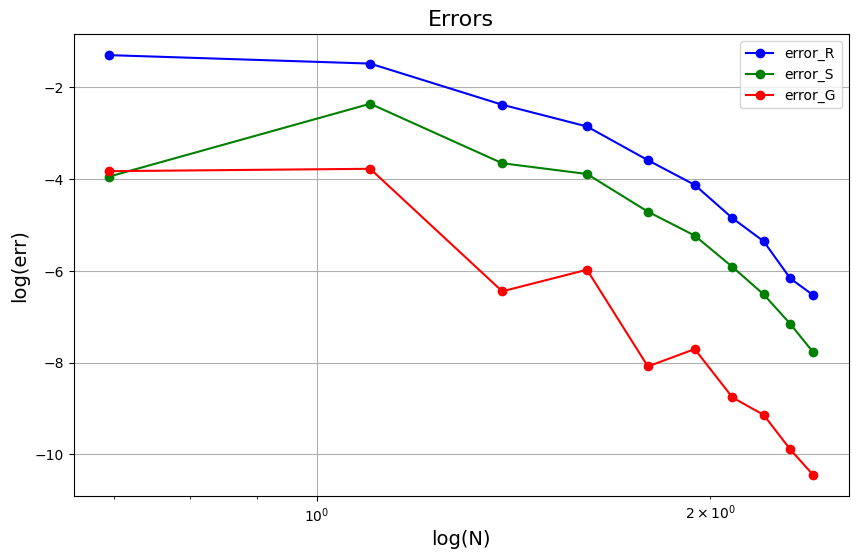

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

filename = "output.txt" 

#data = pd.read_csv(filename, delim_whitespace=True)
file_path = 'output.txt'  
data = pd.read_csv(file_path, sep='\s+', header=0, names=['N', 'error_R', 'error_S', 'error_G'])
N       = data['N']
error_R = data['error_R'] 
error_S = data['error_S']
error_G = data['error_G']

#data.head()


def calculate_p(errors, N):
    p = []
    for i in range(1, len(errors)):
        
        error_i = errors[i] if errors[i] > 1e-10 else 1e-10
        error_prev = errors[i - 1] if errors[i - 1] > 1e-10 else 1e-10

        numerator = np.log(error_prev) - np.log(error_i)
        denominator = np.log(N[i]) - np.log(N[i - 1])

        p_i = numerator / denominator
        
        p.append(p_i)
    return p



pR = calculate_p(data['error_R'], data['N'])
pS = calculate_p(data['error_S'], data['N'])
pG = calculate_p(data['error_G'], data['N'])

print("Convergence index for the rectangle method pR = ", np.mean(pR))
print("Convergence index for the Simpson method   pS = ", np.mean(pS))
print("Convergence index for the Gauss method     pG = ", np.mean(pG))


# logNValues = np.log(data['N'].values[1:])

plt.figure(figsize=(10, 6))
plt.plot(np.log(N), np.log(error_R), label='error_R', marker='o', linestyle='-', color='b')
plt.plot(np.log(N), np.log(error_S), label='error_S', marker='o', linestyle='-', color='g')
plt.plot(np.log(N), np.log(error_G), label='error_G', marker='o', linestyle='-', color='r')

plt.xlabel('log(N)', fontsize=14)
plt.ylabel('log(err)', fontsize=14)
plt.xscale('log') 
plt.title('Errors', fontsize=16)
plt.legend()

plt.grid(True)

plt.savefig(f"error for Runge function.png")  
plt.show()

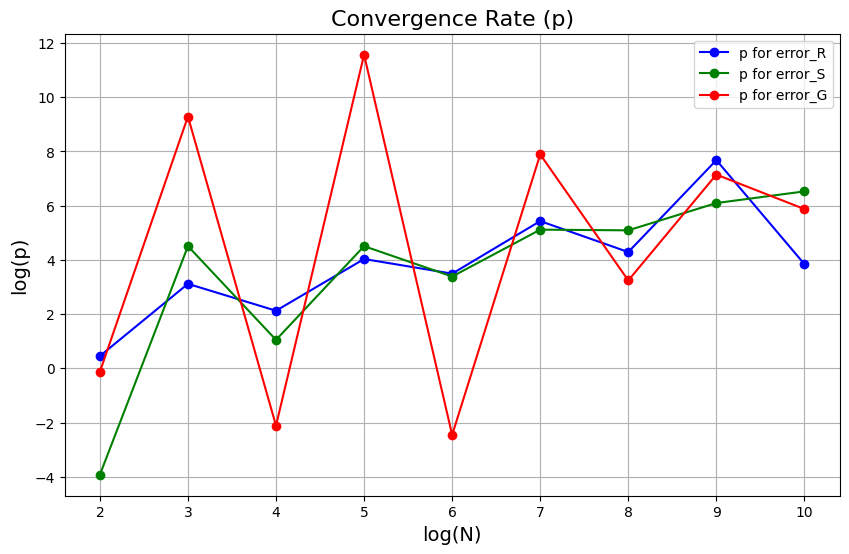

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(N[:-1], pR, label='p for error_R', marker='o', linestyle='-', color='b')
plt.plot(N[:-1], pS, label='p for error_S', marker='o', linestyle='-', color='g')
plt.plot(N[:-1], pG, label='p for error_G', marker='o', linestyle='-', color='r')

plt.xlabel('log(N)', fontsize=14)
plt.ylabel('log(p)', fontsize=14)
#plt.xscale('log') 
plt.title('Convergence Rate (p)', fontsize=16)
plt.legend()

plt.grid(True)

plt.savefig(f"p for Runge function.png")  
plt.show()